In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/04/89/3b831e2b50c9364069609d1335f46c488a149d5f2be14a08741c92a60009/numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 183.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 1.1 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ae/a5/5d1deab99008002dfe2c6122352687fd4c2f82688775177729cb0d67556d/pandas-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pyt

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
dataset = pd.read_csv('kc_house_data.csv')

In [42]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

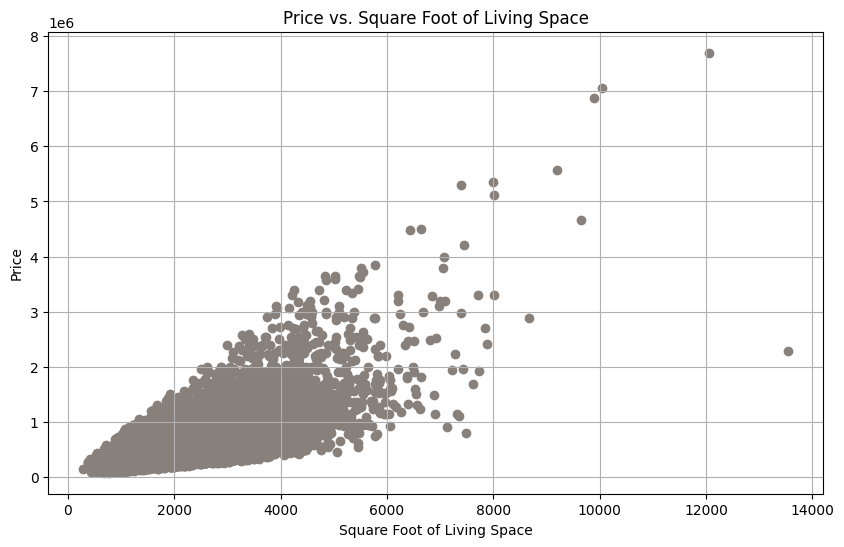

In [44]:
# (a) fit a linear model to the data using the least squares method

plt.figure(figsize=(10, 6))
plt.scatter(dataset['sqft_living'], dataset['price'], color='#88807B', linewidth=1)
plt.title("Price vs. Square Foot of Living Space")
plt.xlabel("Square Foot of Living Space")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [45]:
x = dataset['sqft_living']
y = dataset['price']

all_ones = np.ones(len(x))
At = np.array([all_ones, x, x ** 2], dtype=float)

A = np.transpose(At)
y = np.array(y, dtype=float)

B = np.dot(At, A)
b = np.dot(At, y)
coefficients = np.linalg.solve(B, b)

In [46]:
print(f"y = {coefficients[0]} + {coefficients[1]}x + {coefficients[2]}x^2")

y = 199222.2793054818 + 67.99409468579607x + 0.038581260937201524x^2


In [48]:
Y = np.dot(A, np.linalg.solve(B, b))
# find error
error = np.linalg.norm(y - Y)**2 / np.linalg.norm(y)**2
print(f"Error in percentage is: {error * 100}%")

Error in percentage is: 14.766545098399602%


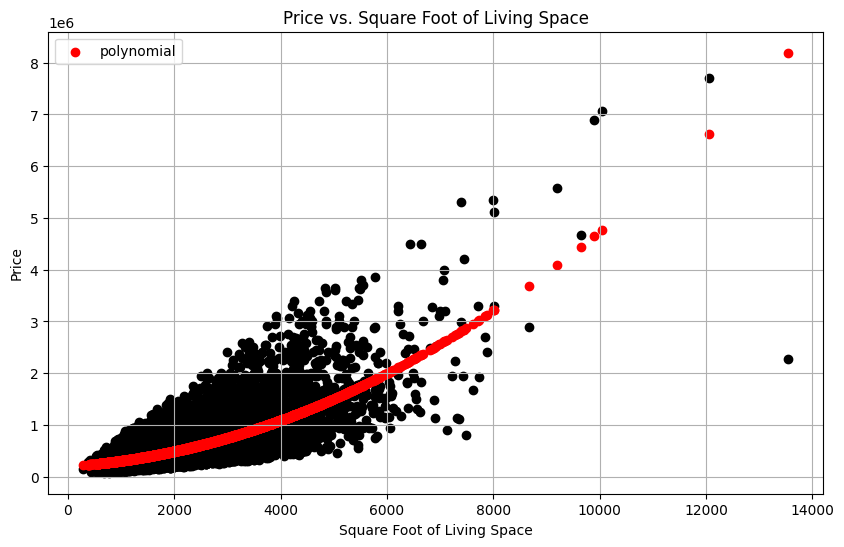

In [51]:
# plot the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black')
plt.scatter(x, Y, color='red', linewidth=1, label='polynomial')
plt.legend(loc='upper left')
plt.title("Price vs. Square Foot of Living Space")
plt.xlabel("Square Foot of Living Space")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# using QR decomposition

In [10]:
price = dataset['price']
sqft_living = dataset['sqft_living']

In [11]:
# Add a column of ones to sqft_living for the intercept term
A = np.column_stack((np.ones(sqft_living.shape[0]), sqft_living))
y = price.values

In [12]:
# Householder QR Decomposition function
def householderQR(A):
    m, n = A.shape
    Q = np.eye(m)  # Initialize Q as an identity matrix
    print(f"m is : {m}")
    print(f"n is : {n}")
    
    for j in range(n):
        # Calculate the Householder vector
        x = A[j:, j]
        v = np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x), 1).flatten() + x
        v = v / np.linalg.norm(v)

        # Form the Householder matrix
        Hj = np.eye(m)
        Hj[j:, j:] -= 2 * np.outer(v, v)

        print(f"--------- H{j+1} -----------")
        # Apply the Householder transformation
        A = np.dot(Hj, A)
        Q = np.dot(Q, Hj)  # Update Q

    R = A
    return Q, R

# Perform the decomposition
Q, R = np.linalg.qr(A)

In [13]:
# Reconstruct A from Q and R
A_reconstructed = np.dot(Q, R)
# set R small values to zero
R[np.abs(R) < 1e-10] = 0
print(R)
# export the data of R to csv file
np.savetxt("R.csv", R, delimiter=",")


[[-1.47013605e+02 -3.05773558e+05]
 [ 0.00000000e+00 -1.35020183e+05]]


In [14]:
# Compute vector b as Q-transpose times y
b = np.dot(np.transpose(Q), y)
# make b_vec as np array
b_vec = np.array(b)
print(b.shape)
print(R.shape)
np.savetxt("B.csv", b_vec, delimiter=",")

(2,)
(2, 2)


In [15]:
def backward_substitution(A, b):
    # Solve for the coefficients (prices) using backward substitution
    m, n = A.shape
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x


In [16]:
# Solve for the liner coefficients
coefficients = backward_substitution(R, b)
print(coefficients)

[-43580.74309447    280.6235679 ]


In [17]:
# Define the liner function
def polynomial(x, coeffs):
    # This assumes coeffs is [beta_0, beta_1, beta_2]
    return coeffs[0] + coeffs[1]*x


In [18]:
# Create a string representation of the liner function
polynomial_str = f'Price = {coefficients[0]} + {coefficients[1]}*SquareFootage'
print(polynomial_str)

Price = -43580.743094474434 + 280.6235678974484*SquareFootage


In [19]:
# find the error for first order liner function
def error(y, y_hat):
    return np.linalg.norm(y - y_hat)**2 / np.linalg.norm(y)**2

In [20]:
error = error(price, polynomial(sqft_living, coefficients))
print(f"Error is: {error}")
# present the error in percentage
print(f"Error in percentage is: {error * 100}%")


Error is: 0.16027169923262286
Error in percentage is: 16.027169923262285%


In [21]:
# the second order polynomial
t = sqft_living
y = price.values
t_squared = t ** 2

A_2 = np.column_stack((np.ones(t.shape[0]), t, t_squared))

In [22]:
# Perform the decomposition using numpy QR factorization
Q, R = np.linalg.qr(A_2)

In [23]:
# Compute vector b as Q-transpose times y
b = np.dot(Q.T, y)


In [24]:
# Solve for the polynomial coefficients
coefficients_2 = backward_substitution(R, b)
print(coefficients_2)

[1.99222279e+05 6.79940947e+01 3.85812609e-02]


In [25]:
# Update the polynomial function
def polynomial_2(x, z, coeffs):
    # This assumes coeffs is [beta_0, beta_1 (for sqft_living), beta_2 (for sqft_living^2)]
    return coeffs[0] + coeffs[1]*x + coeffs[2]*z

In [26]:
# Update the string representation of the polynomial
polynomial_str = f'Price = {coefficients_2[0]} + {coefficients_2[1]}*SquareFootage + {coefficients_2[2]}*SquareFootage^2'
print(polynomial_str)

Price = 199222.27930548447 + 67.99409468579407*SquareFootage + 0.038581260937201815*SquareFootage^2


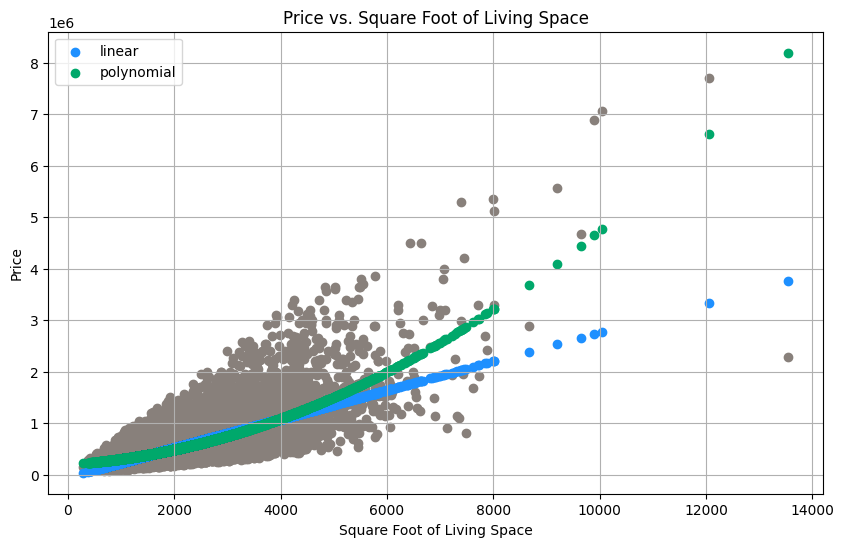

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(sqft_living, price, color='#88807B', linewidth=1)
plt.scatter(sqft_living, polynomial(sqft_living, coefficients), color='dodgerblue', linewidth=1, label='linear')
plt.scatter(t, np.dot(A_2, coefficients_2), color='#00A86B', linewidth=1, label='polynomial')
plt.legend(loc='upper left')
plt.title("Price vs. Square Foot of Living Space")
plt.xlabel("Square Foot of Living Space")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [28]:
# find the error for second order polynomial
def error(y, y_hat):
    return np.linalg.norm(y - y_hat)**2 / np.linalg.norm(y)**2

error = error(price, polynomial_2(sqft_living, t_squared, coefficients_2))
print(f"Error is: {error}")
# present the error in percentage
print(f"Error in percentage is: {error * 100}%")

Error is: 0.14766545098399603
Error in percentage is: 14.766545098399602%


# using SVD

In [52]:
drows = 200000000
x = dataset['sqft_living']
y = dataset['price']
all_ones = np.ones(len(x))
A = np.array([all_ones, x, x ** 2], dtype=float)
b = np.array(y, dtype=float)
A_transpose = np.transpose(A)
pad = np.zeros([drows - 3, 3], dtype=float)

# Step To solve

Ax=b => Ax-b = 0

A= U S V_T

(U * S * V_T) * x = b

S* V_T * x = U_T * b

S* V_T * x - U_T * b = 0

c = U_T * b

z = V_T * x

S * z=c => z = c/S

In [53]:
U, S, Vh = np.linalg.svd(A_transpose, full_matrices=True)
S_diag= np.diag(S)
diagMatrix = np.concatenate((S_diag,pad),axis=0)

In [54]:
U_T = np.transpose(U)
V = np.transpose(Vh)

In [55]:
c = U_T.dot(b)

z1 = c[0]/diagMatrix[0][0]
z2 = c[1]/diagMatrix[1][1]
z3 = c[2]/diagMatrix[2][2]

In [56]:
z = np.array([z1, z2, z3])

In [57]:
delt_x = V.dot(z)

In [58]:
print(f'{delt_x[0]} + {delt_x[1]}x + {delt_x[2]}x^2 = y')

199222.27930572652 + 67.99409468574248x + 0.03858126093720509x^2 = y


In [59]:
delta_b = A_transpose.dot(delt_x)

In [61]:
error = np.linalg.norm(price - delta_b)**2 / np.linalg.norm(price)**2
print(f"Error in percentage is: {error * 100}%")

Error in percentage is: 14.766545098399602%


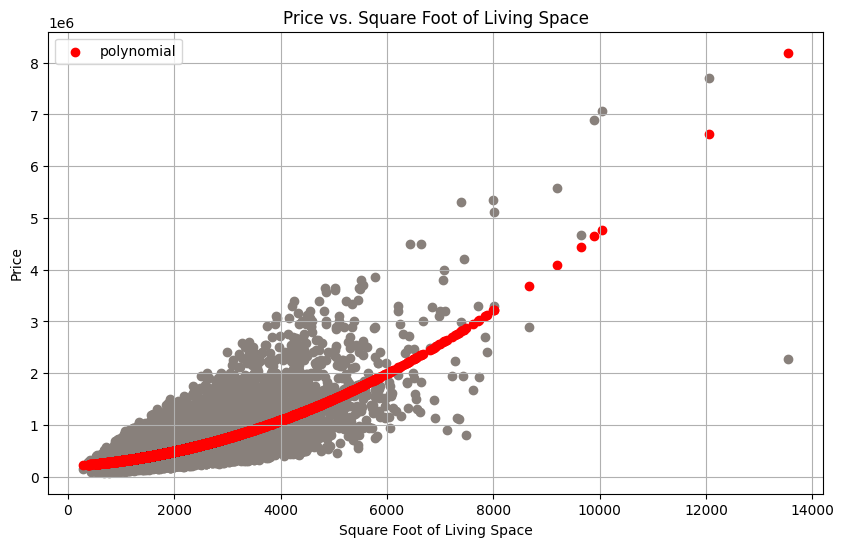

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(x, price, color='#88807B', linewidth=1)
plt.scatter(x, delta_b, color='red', linewidth=1, label='polynomial')
plt.legend(loc='upper left')
plt.title("Price vs. Square Foot of Living Space")
plt.xlabel("Square Foot of Living Space")
plt.ylabel("Price")
plt.grid(True)
plt.show()